In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
from prepare import makedatetime, plots, add_sales_total, hists
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# wrangle

import prepare

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

# for tsa
import statsmodels.api as sm

# holt's linear trend model.
from statsmodels.tsa.api import Holt, ExponentialSmoothing



In [2]:
df = pd.read_csv('tsa_store_data.csv')

In [3]:
df = makedatetime(df)

In [4]:
df = add_sales_total(df)

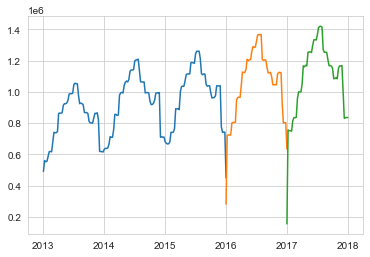

In [5]:
train_size = 0.60
val_size = .20# 80% train, 20% test
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # Everything up to but not including the test_start_index
test = df[test_start_index:] # Everything from the test_start_index to the end
val_start_index = round(val_size * n)
validate = test[:val_start_index]
test = test[val_start_index:]
train = train.resample('W').sum()
validate = validate.resample('W').sum()
test = test.resample('W').sum()
plt.plot(train.index, train.sales_total)
plt.plot(validate.index, validate.sales_total)
plt.plot(test.index, test.sales_total)

In [6]:
train

,store_id,item_id,item_upc14,item_upc12,item_price,sale_id,sale_amount,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,
2013-01-06,16500,76500,715406353473120,715406353473120,15481.20,1366771500,91067,234674400,3000,10500,490767.50
2013-01-13,19250,89250,834640745718640,834640745718640,18061.40,1594589500,103902,273786800,3500,35000,559934.21
2013-01-20,19250,89250,834640745718640,834640745718640,18061.40,1594614000,102950,273786800,3500,59500,552813.52
2013-01-27,19250,89250,834640745718640,834640745718640,18061.40,1594638500,103298,273786800,3500,84000,554908.84
2013-02-03,19250,89250,834640745718640,834640745718640,18061.40,1594663000,109027,273786800,5000,62000,586547.55
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-06,19250,89250,834640745718640,834640745718640,18061.40,1598289000,144099,273786800,41500,25500,775933.51
2015-12-13,19250,89250,834640745718640,834640745718640,18061.40,1598313500,137610,273786800,42000,35000,740263.07
2015-12-20,19250,89250,834640745718640,834640745718640,18061.40,1598338000,138286,273786800,42000,59500,743523.26


In [7]:

def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate,
    and the predicted values stored in yhat_df,
    and compute the rmse, rounding to 0 decimal places.
    it will return the rmse.
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [8]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df.
    it will als lable the rmse.
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1)
    plt.plot(validate[target_var], label='Validate', linewidth=1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()


In [9]:

# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable.
    It returns the eval_df with the rmse appended to it for that model and target_var.
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
         'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [10]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df


,model_type,target_var,rmse


## Forecasting:

Last observed value:

In [12]:
last_sales = train.sales_total[-1:][0]

In [13]:
last_quantity = train.sales_total[-1:][0]

In [14]:
yhat_df = pd.DataFrame(
    {'sales_total': [last_sales],
     'sale_amount': [last_quantity]},
    index=validate.index)

yhat_df.head()

,sales_total,sale_amount
sale_date,,
2016-01-03,449296.47,449296.47
2016-01-10,449296.47,449296.47
2016-01-17,449296.47,449296.47
2016-01-24,449296.47,449296.47
2016-01-31,449296.47,449296.47


sales_total -- RMSE: 639376


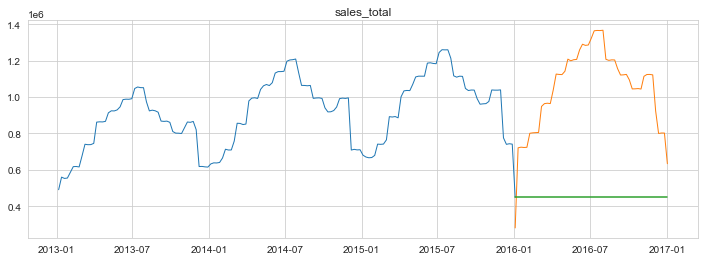

In [15]:
plot_and_eval('sales_total')

In [46]:
model_df = train[['sales_total','sale_amount']]

In [17]:

for col in model.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value',
                             target_var = col)

eval_df

,model_type,target_var,rmse
0,last_observed_value,sales_total,639376.0
1,last_observed_value,sale_amount,257535.0


Simple average:

In [18]:
# compute simple average
avg_sales = round(train['sales_total'].mean(), 2)
avg_sales

911806.45

In [19]:
avg_quantity = round(train['sale_amount'].mean(), 2)
avg_quantity

169589.92

In [20]:
def make_predictions(sales=None, quantity=None):
    yhat_df = pd.DataFrame({'sales_total': [sales],
                            'sale_amount': [quantity]},
                           index=validate.index)
    return yhat_df


In [21]:
yhat_df = make_predictions(avg_sales, avg_quantity)

In [22]:
yhat_df

,sales_total,sale_amount
sale_date,,
2016-01-03,911806.45,169589.92
2016-01-10,911806.45,169589.92
2016-01-17,911806.45,169589.92
2016-01-24,911806.45,169589.92
2016-01-31,911806.45,169589.92
2016-02-07,911806.45,169589.92
2016-02-14,911806.45,169589.92
2016-02-21,911806.45,169589.92
2016-02-28,911806.45,169589.92


sales_total -- RMSE: 261200


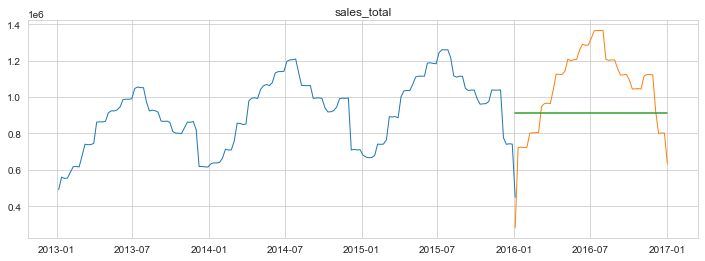

sale_amount -- RMSE: 48589


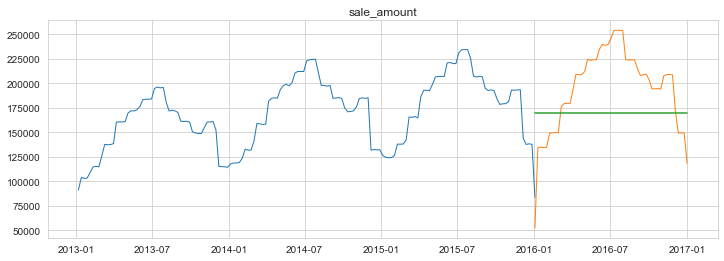

In [23]:
for col in model.columns:
    plot_and_eval(col)


In [24]:
for col in model.columns:
    eval_df = append_eval_df(model_type='simple_average',
                             target_var = col)
eval_df


,model_type,target_var,rmse
0,last_observed_value,sales_total,639376.0
1,last_observed_value,sale_amount,257535.0
2,simple_average,sales_total,261200.0
3,simple_average,sale_amount,48589.0


Moving average:

In [25]:
# demonstrate that the mean of the first 30 days
# is equal to rolling(30) on day 30

print(train['sales_total'].rolling(30).mean())


sale_date
2013-01-06             NaN
2013-01-13             NaN
2013-01-20             NaN
2013-01-27             NaN
2013-02-03             NaN
                  ...     
2015-12-06    1.091010e+06
2015-12-13    1.078517e+06
2015-12-20    1.066130e+06
2015-12-27    1.053679e+06
2016-01-03    1.029094e+06
Freq: W-SUN, Name: sales_total, Length: 157, dtype: float64


In [26]:
period=30
train['sales_total'].rolling(period).mean()[-1]

1029093.882

In [27]:

period = 30

# take 30 day rolling average, then take the last element and that will the one that propogates
# forward as our prediction.
rolling_sales = round(train['sales_total'].rolling(period).mean()[-1], 2)
rolling_quantity = round(train['sale_amount'].rolling(period).mean()[-1], 2)
print(rolling_sales, rolling_quantity)



1029093.88 191395.4


In [28]:
yhat_df = make_predictions(rolling_sales, rolling_quantity)
yhat_df.head()


,sales_total,sale_amount
sale_date,,
2016-01-03,1029093.88,191395.4
2016-01-10,1029093.88,191395.4
2016-01-17,1029093.88,191395.4
2016-01-24,1029093.88,191395.4
2016-01-31,1029093.88,191395.4


sales_total -- RMSE: 223299


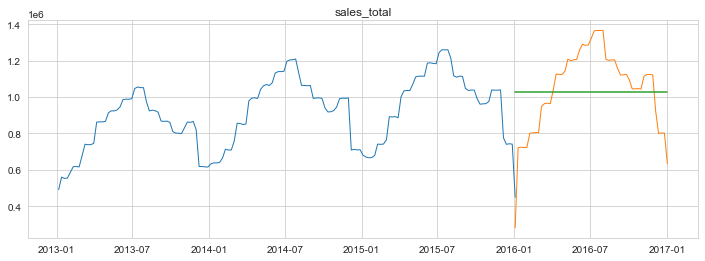

sale_amount -- RMSE: 41518


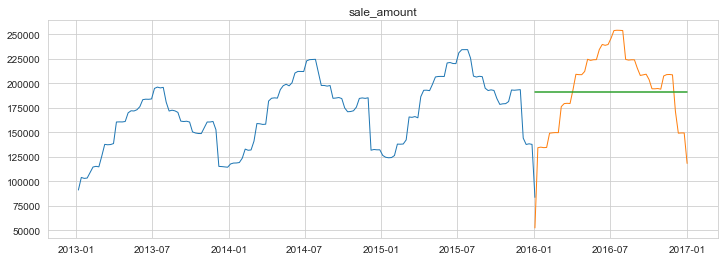

In [29]:
for col in model.columns:
    plot_and_eval(col)


In [30]:
for col in model.columns:
    eval_df = append_eval_df(model_type = '30d_moving_avg',
                             target_var = col)

eval_df


,model_type,target_var,rmse
0,last_observed_value,sales_total,639376.0
1,last_observed_value,sale_amount,257535.0
2,simple_average,sales_total,261200.0
3,simple_average,sale_amount,48589.0
4,30d_moving_avg,sales_total,223299.0
5,30d_moving_avg,sale_amount,41518.0


In [31]:
#Let's try out several other values for periods
periods = [4, 12, 26, 52, 104]

for p in periods:
    rolling_sales = round(train['sales_total'].rolling(p).mean()[-1], 2)
    rolling_quantity = round(train['sale_amount'].rolling(p).mean()[-1], 2)
    yhat_df = make_predictions(rolling_sales, rolling_quantity)
    model_type = str(p) + '_day_moving_avg'
    for col in model.columns:
        eval_df = append_eval_df(model_type = model_type,
                                 target_var = col)


In [32]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,sales_total,639376.0
1,last_observed_value,sale_amount,257535.0
2,simple_average,sales_total,261200.0
3,simple_average,sale_amount,48589.0
4,30d_moving_avg,sales_total,223299.0
5,30d_moving_avg,sale_amount,41518.0
6,4_day_moving_avg,sales_total,440433.0
7,4_day_moving_avg,sale_amount,82007.0
8,12_day_moving_avg,sales_total,281824.0
9,12_day_moving_avg,sale_amount,52437.0


In [33]:
min_items_rmse = eval_df[eval_df.target_var == 'sale_amount']['rmse'].min()


Best results for sale_amount

In [34]:
eval_df[eval_df.rmse == min_items_rmse]


,model_type,target_var,rmse
5,30d_moving_avg,sale_amount,41518.0


Best results for sales_total

In [35]:
min_dollars_rmse = eval_df[eval_df.target_var == 'sales_total']['rmse'].min()

eval_df[eval_df.rmse == min_dollars_rmse]


,model_type,target_var,rmse
4,30d_moving_avg,sales_total,223299.0


Holts models:

In [36]:
import statsmodels.api as sm


sale_amount 



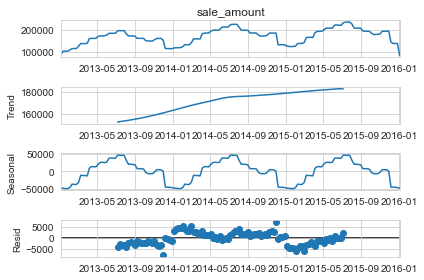

In [37]:
print(col, '\n')
sm.tsa.seasonal_decompose(train[col].resample('W').mean()).plot()
plt.show()


sales_total 

sale_amount 



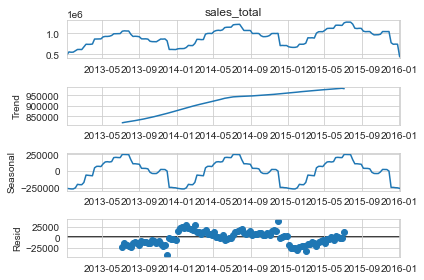

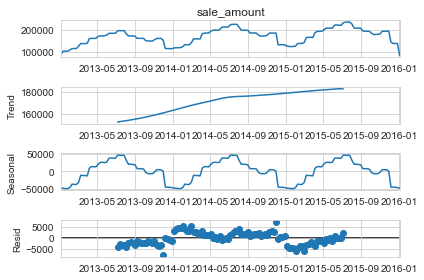

In [38]:
for col in model.columns:
    print(col,'\n')
    sm.tsa.seasonal_decompose(train[col].resample('W').mean()).plot()





Basic Holt's Linear Trend

In [39]:

col = 'sales_total'
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)



In [40]:
# fit the holt's object
model = model.fit(optimized=True)


In [41]:
yhat_items = model.predict(start = validate.index[0],
                           end = validate.index[-1])


In [42]:
validate.shape

(53, 11)

In [43]:

yhat_items

2016-01-03    7.154930e+05
2016-01-10    3.879421e+05
2016-01-17    3.258836e+05
2016-01-24    2.644458e+05
2016-01-31    2.036222e+05
2016-02-07    1.434070e+05
2016-02-14    8.379385e+04
2016-02-21    2.477685e+04
2016-02-28   -3.364997e+04
2016-03-06   -9.149252e+04
2016-03-13   -1.487567e+05
2016-03-20   -2.054481e+05
2016-03-27   -2.615727e+05
2016-04-03   -3.171360e+05
2016-04-10   -3.721437e+05
2016-04-17   -4.266013e+05
2016-04-24   -4.805144e+05
2016-05-01   -5.338883e+05
2016-05-08   -5.867285e+05
2016-05-15   -6.390402e+05
2016-05-22   -6.908289e+05
2016-05-29   -7.420997e+05
2016-06-05   -7.928577e+05
2016-06-12   -8.431082e+05
2016-06-19   -8.928562e+05
2016-06-26   -9.421067e+05
2016-07-03   -9.908646e+05
2016-07-10   -1.039135e+06
2016-07-17   -1.086923e+06
2016-07-24   -1.134233e+06
2016-07-31   -1.181069e+06
2016-08-07   -1.227438e+06
2016-08-14   -1.273342e+06
2016-08-21   -1.318788e+06
2016-08-28   -1.363779e+06
2016-09-04   -1.408320e+06
2016-09-11   -1.452416e+06
2

In [47]:
# doing this in a loop for each column
for col in model_df.columns:
    model = Holt(train[col], exponential=False, damped=True)
    model = model.fit(optimized=True)
    yhat_items = model.predict(start = validate.index[0],
                               end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)



In [48]:
yhat_df

,sales_total,sale_amount,store_id,item_id,item_upc14,item_upc12,item_price,sale_id,store_zipcode,month,day
sale_date,,,,,,,,,,,
2016-01-03,715492.96,132877.02,19250.00,89250.00,8.346407e+14,8.346407e+14,18061.40,1.598387e+09,2.737868e+08,42104.32,59518.02
2016-01-10,387942.12,72135.46,12363.48,50446.56,4.699593e+14,4.699593e+14,10122.92,9.036497e+08,1.544239e+08,24490.03,60573.36
2016-01-17,325883.65,60594.83,9831.67,34257.69,3.178136e+14,3.178136e+14,7169.60,6.138180e+08,1.046255e+08,24590.02,61670.10
2016-01-24,264445.76,49169.61,7323.90,18230.72,1.671893e+14,1.671893e+14,4427.64,3.268846e+08,5.532507e+07,24689.01,62755.87
2016-01-31,203622.25,37858.64,4839.96,2364.01,1.807125e+13,1.807125e+13,1881.91,4.282058e+07,6.517657e+06,24787.02,63830.78
2016-02-07,143406.97,26660.78,2379.61,-13344.03,-1.295556e+14,-1.295556e+14,-481.64,-2.384028e+08,-4.180169e+07,24884.04,64894.95
2016-02-14,83793.85,15574.90,-57.36,-28894.99,-2.757062e+14,-2.757062e+14,-2676.04,-5.168140e+08,-8.963784e+07,24980.09,65948.47
2016-02-21,24776.85,4599.87,-2471.18,-44290.43,-4.203953e+14,-4.203953e+14,-4713.40,-7.924411e+08,-1.369956e+08,25075.18,66991.46
2016-02-28,-33649.97,-6265.40,-4862.07,-59531.93,-5.636374e+14,-5.636374e+14,-6604.95,-1.065312e+09,-1.838798e+08,25169.33,68024.02


store_id -- RMSE: 68504


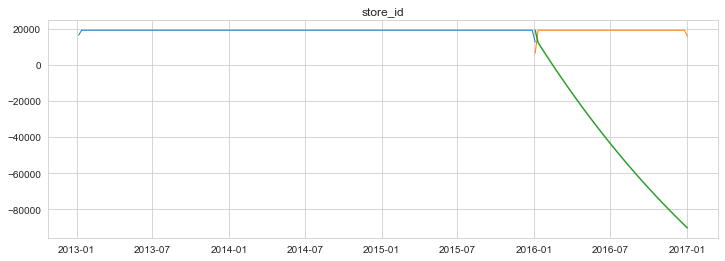

item_id -- RMSE: 430078


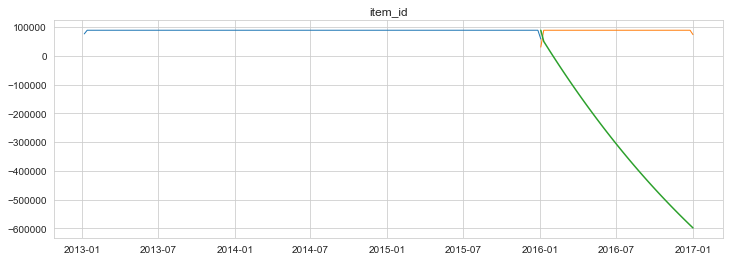

item_upc14 -- RMSE: 4041909646047239


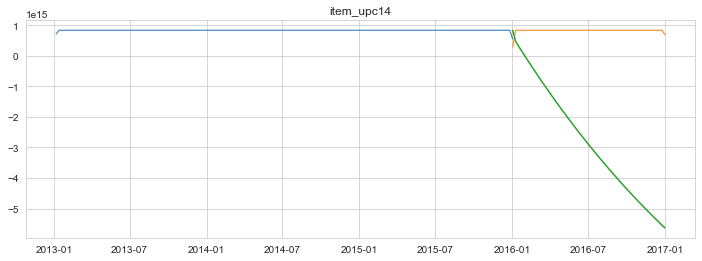

item_upc12 -- RMSE: 4041909646047239


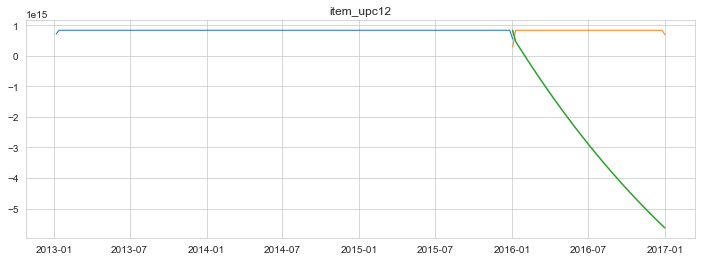

item_price -- RMSE: 39462


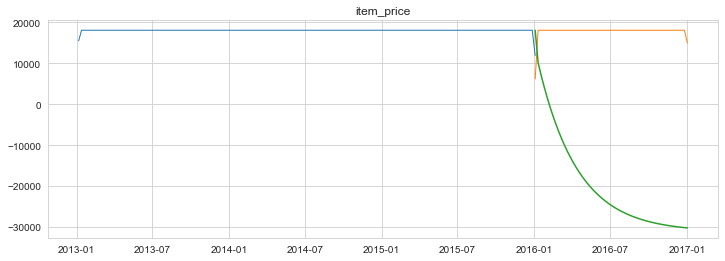

sale_id -- RMSE: 7700519551


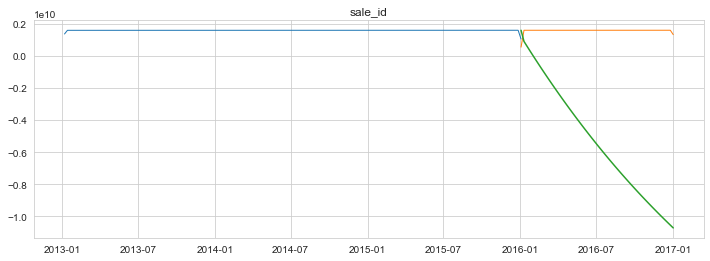

sale_amount -- RMSE: 401437


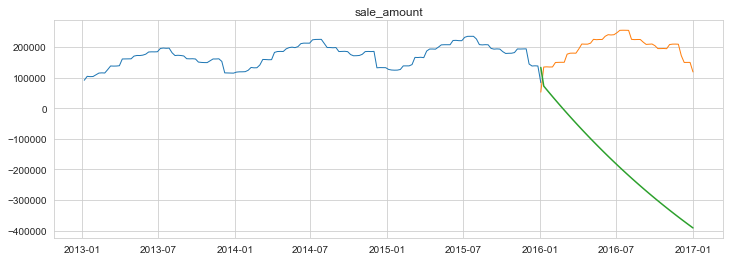

store_zipcode -- RMSE: 1322954206


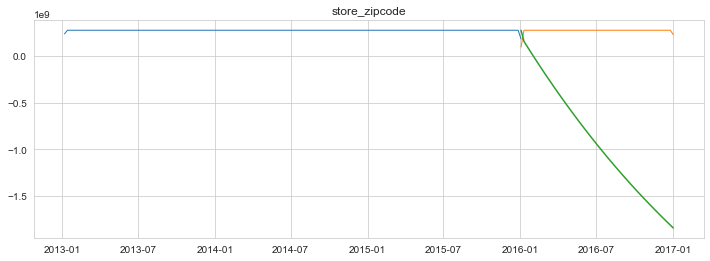

month -- RMSE: 12537


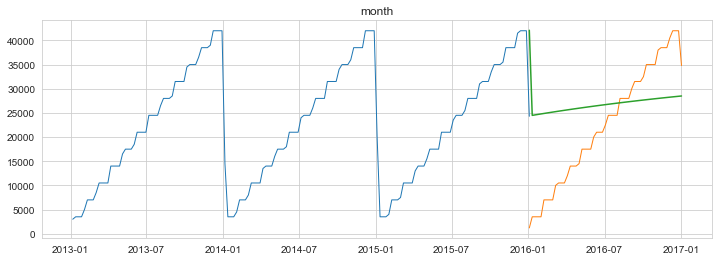

day -- RMSE: 39687


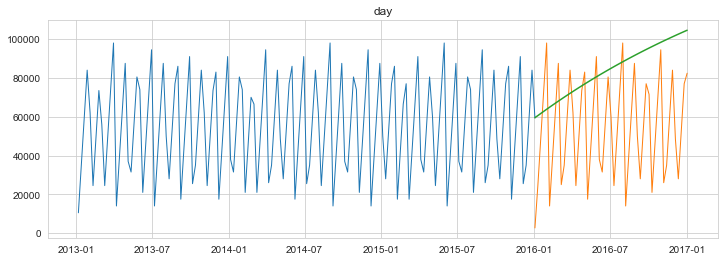

sales_total -- RMSE: 2158212


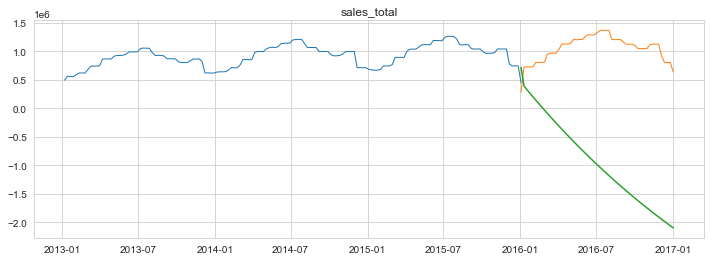

In [50]:
for col in train.columns:
    plot_and_eval(target_var = col)


In [51]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_optimized',
                             target_var = col)


In [52]:
eval_df.sort_values(by='rmse')


,model_type,target_var,rmse
24,holts_optimized,month,12537.0
20,holts_optimized,item_price,39462.0
25,holts_optimized,day,39687.0
5,30d_moving_avg,sale_amount,41518.0
11,26_day_moving_avg,sale_amount,42240.0
13,52_day_moving_avg,sale_amount,43332.0
15,104_day_moving_avg,sale_amount,44451.0
3,simple_average,sale_amount,48589.0
9,12_day_moving_avg,sale_amount,52437.0
16,holts_optimized,store_id,68504.0


In [57]:
# Models for quantity
fit1 = ExponentialSmoothing(train.sale_amount, seasonal_periods=52, trend='add', seasonal='add').fit()
fit2 = ExponentialSmoothing(train.sale_amount, seasonal_periods=52, trend='add', seasonal='mul').fit()
fit3 = ExponentialSmoothing(train.sale_amount, seasonal_periods=52, trend='add', seasonal='add', damped=True).fit()
fit4 = ExponentialSmoothing(train.sale_amount, seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit()
# Models for sales
fit5 = ExponentialSmoothing(train.sales_total, seasonal_periods=52, trend='add', seasonal='add').fit()
fit6 = ExponentialSmoothing(train.sales_total, seasonal_periods=52, trend='add', seasonal='mul').fit()
fit7 = ExponentialSmoothing(train.sales_total, seasonal_periods=52, trend='add', seasonal='add', damped=True).fit()
fit8 = ExponentialSmoothing(train.sales_total, seasonal_periods=52, trend='add', seasonal='mul', damped=True).fit()


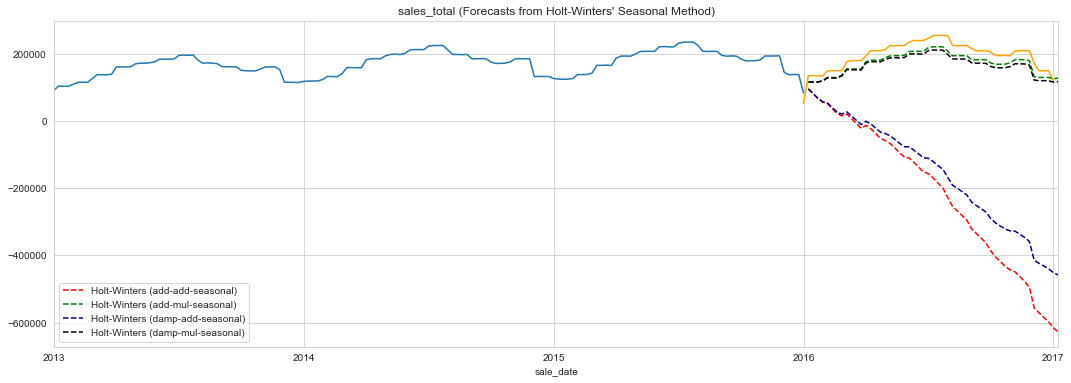

In [60]:
results_quantity=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results_quantity["Additive_Quantity"]       = [fit1.params[p] for p in params] + [fit1.sse]
results_quantity["Multiplicative_Quantity"] = [fit2.params[p] for p in params] + [fit2.sse]
results_quantity["Additive_Damp_Quantity"]   = [fit3.params[p] for p in params] + [fit3.sse]
results_quantity["Multiplica_Damp_Quantity"] = [fit4.params[p] for p in params] + [fit4.sse]

results_sales=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results_sales["Additive_Sales"]       = [fit5.params[p] for p in params] + [fit1.sse]
results_sales["Multiplicative_Sales"] = [fit6.params[p] for p in params] + [fit2.sse]
results_sales["Additive_Damp_Sales"]   = [fit7.params[p] for p in params] + [fit3.sse]
results_sales["Multiplica_Damp_Sales"] = [fit8.params[p] for p in params] + [fit4.sse]

ax = validate.sale_amount.plot(figsize=(18,6), color='orange', title="sales_total (Forecasts from Holt-Winters' Seasonal Method)")
ax.set_ylabel("")
ax.set_xlabel("Year")
train.sale_amount.plot()
#fit1.fittedvalues.plot(ax=ax, style='--', color='blue')
#fit2.fittedvalues.plot(ax=ax, style='--', color='orange')

fit1.forecast(validate.shape[0]).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', color='red', legend=True)
fit2.forecast(validate.shape[0]).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', color='green', legend=True)
fit3.forecast(validate.shape[0]).rename('Holt-Winters (damp-add-seasonal)').plot(ax=ax, style='--', color='darkblue', legend=True)
fit4.forecast(validate.shape[0]).rename('Holt-Winters (damp-mul-seasonal)').plot(ax=ax, style='--', color='black', legend=True)

plt.show()


Holt's Seasonal Trend